In [1]:
#Online Retail 데이터 기본 정보
#InvoiceNo 6자리 숫자로 된 고유번호
#StockCode 5자리 숫자로 된 상품코드(상품으로 간주)
#Description 상품명
#Quantity 한 거래당 판매된 상품 수
#InvoiceDate 거래가 성립된 일시 MM/DD/YY HH:MM
#UnitPrice 가격
#CustomerID 사용자ID
#Country 사용자 국가

#2011년 거래 데이터를 이용하여 같은 상품을 구입한 영국에 거주하는 사용자 그룹을 찾기
#StockCode를 이용하여 CustomerID 군집화


In [2]:
#데이터 전처리
#고유 사용자 수와 고유 상품 수를 사용하므로 기초 통계량 조사
#전체 사용자 수 및 상품 수를 구하고, 한 사용자고 구매한 고유 상품 수의 기초 통계량(고유상품 수의 최솟값, 최댓값, 평균값, 표준편차)
#기초 통계량을 구하면 데이터 전체 모습과 군집화의 노이즈가 될 수 있는 예외값 알 수 있음

#user_product_dic : 사용자ID를 키로 그 사용자가 구입한 상품코드의 셋을 값으로 하는 딕셔너리
#product_user_dic : 상품코드를 키로 그 상품을 구입한 사용자ID의 셋을 값으로 하는 딕셔너리

#product_per_user_li를 이용하여 사용자 구매한 상품수를 리스트에 저장, 사용자 구매한 고유상품의 최솟값, 최댓값, 평균값, 표준편차 구함
#product_id_name_dic: 상품코드를 키로 상품명을 값으로 하는 딕셔너리




In [3]:
import time
from scipy import stats

# 데이터 구조 정의
# 사용자ID를 키로 갖고 상품코드의 셋을 값으로 갖는 딕셔너리와
# 상품코드를 키로 갖고 사용자 ID의 셋을 값으로 갖는 딕셔너리
user_product_dic= {}
product_user_dic= {}

# 상품 코드를 키로 갖고 상품명을 값으로 갖는 딕셔너리
# 군집화의 내용을 확인하는 단계에서 상품명을 사용
product_id_name_dic = {}



In [4]:
# 파일을 읽어 위에서 정의한 데이터구조를 채움
for line in open ('Online Retail.txt'):
    #데이터를 한 행씩 읽어 필요한 항목을 저장.
    line_items = line.strip().split('\t')
    user_code = line_items[6]
    product_id = line_items[1]
    product_name = line_items[2]
    
    #사용자 ID가 없을 경우 무시
    if len(user_code) == 0:
        continue
    
    #영국에서 구매한 사용자만 고려하므로 국가가 united kingdom이 아닌 경우 무시
    country = line_items[7]
    if country != 'United Kingdom':
        continue
        
    #연도를 읽을 때 에러처리, 파일 헤더 무시
    try:
        invoice_year = time.strptime(line_items[4], '%Y-%m-%d %H:%M').tm_year 
    except ValueError:
        continue
    
    #2011년에 일어난 구매가 아닌 것은 무시
    if invoice_year != 2011:
        continue
        
    #읽은 정보로 데이터 구조를 채웁니다.
    #상품 가짓수를 고려하므로 상품코드를 셋으로 가지도록 함
    user_product_dic.setdefault(user_code, set())
    user_product_dic[user_code].add(product_id)
    
    product_user_dic.setdefault(product_id, set())
    product_user_dic[product_id].add(user_code)
    
    product_id_name_dic[product_id] = product_name

# 데이터 구조를 다 채웠으므로 각 사용자가 구매한 상품 가짓수로 리스트를 만든다
product_per_user_li = [len(x) for x in user_product_dic.values()]

# 이 장에서 사용할 최종 사용자 수와 상품 가짓수를 출력
print('# of users:', len(user_product_dic))
print('# of products',len(product_user_dic))

#각 사용자가 구매한 상품 가짓수로 기초 통계량을 출력
print(stats.describe(product_per_user_li))



# of users: 3835
# of products 3588
DescribeResult(nobs=3835, minmax=(1, 1603), mean=58.69074315514993, variance=6207.1088214350575, skewness=5.833816723404396, kurtosis=72.60364097540136)


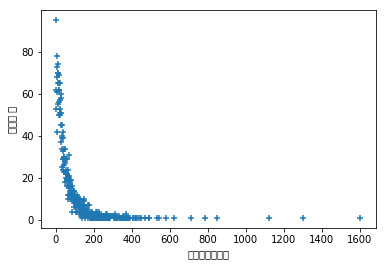

In [6]:
# 각 사용자가 구매하는 고유 상품 가짓수
from collections import Counter
import matplotlib.pyplot as plt

# 사용자가 구매한 고유 상품 가짓수를 플롯
plot_data_all = Counter(product_per_user_li)
plot_data_x = list(plot_data_all.keys())
plot_data_y = list(plot_data_all.values())
plt.xlabel('고유상품가짓수')
plt.ylabel('사용자 수')
plt.scatter(plot_data_x, plot_data_y, marker='+')

plt.show()

In [7]:
#하나의 상품만 구매하는 사용자나 1년간 600개 이상을 구매하는 사용자는 예외 처리로 제외

#구매한 상품의 기짓수가 1인 사용자 ID 찾기
min_product_user_li = [k for k, v in user_product_dic.items() if len(v) == 1]

In [8]:
#마찬가지로 구매한 상품의 가짓수가 600 이상인 사용자ID 찾기
max_product_user_li = [ k for k, v in user_product_dic.items() if len(v) >=600]

In [10]:
print("# of users purchased one product: %d"% (len(min_product_user_li)))
print("# of users purchased more than 600 product:%d"%(len(max_product_user_li)))

# of users purchased one product: 95
# of users purchased more than 600 product:7


In [11]:
#찾아낸 사용자를 군집화에 사용할 suer_product_dic에서 제거

user_product_dic = {k:v for k,v in user_product_dic.items() if len(v)>1 and len(v)<600}

print("# of left user:%d" % (len(user_product_dic)))

# of left user:3733


In [12]:
#남아 있는 사용자가 구매한 상품에도 0에서 시작하는 고유 ID 부여
#데이터셋에서 제외된 사용자가 구매한 상품은 군집화에서 사용하지 않기 때문
id_product_dic={}

for product_set_li in user_product_dic.values():
    for x in product_set_li:
        if x in id_product_dic:
            product_id = id_product_dic[x]
        else:
            id_product_dic.setdefault(x, len(id_product_dic))
print("# of left items:%d"%(len(id_product_dic)))

# of left items:3568


In [15]:
#user_product_dic : 사용자 ID를 키, 구매한 상품ID를 값
print(user_product_dic)

{'13313': {'22961', '20718', '22302', '22896', '22303', '22382', '23153', '22419', '21498', '85099C', '22379', '22898', '22383', '23350', '22862', '22386', '22809', '23222', '23202', '22458', '22384', '22808', '21499', '23103', '20728', '23301', '23582', '23256', '21519', '23206', '85123A', '22742', '85099B', '23199', '22381', '22420', '21891', '22751', '20727', '84997D', '21930', '22421', '84997C', '84755', '23203', '20682', '22667'}, '18097': {'22738', '16156S', '48138', '22644', '23184', '23413', '22759', '20829', '22693', '71459', '23092', '23503', '22739', '23490', '23144', '22151', '48185', '22060', '21411', '22583', '22582', '23093', '21745', '21363', '22062', '23504', '22768', '22904', '21231', '21232', '22652', '22418', '23176', '22649', '23118', '22508', '48194', '22457', '22653', '84970S', '84378', '23284', '85066', '70006', '22109', '72351B', '21733', '22555', '84077', '48188', '23111', '23230', '23177', '22557', '22986', '84991', '84879', '84970L', '22915', '22485', '22960

In [16]:
#id_product_dic : 0으로 시작하는 상품Id를 키로, 상품코드를 값으로 하는 딕셔너리
print(id_product_dic)

{'22961': 0, '20718': 1, '22302': 2, '22896': 3, '22303': 4, '22382': 5, '23153': 6, '22419': 7, '21498': 8, '85099C': 9, '22379': 10, '22898': 11, '22383': 12, '23350': 13, '22862': 14, '22386': 15, '22809': 16, '23222': 17, '23202': 18, '22458': 19, '22384': 20, '22808': 21, '21499': 22, '23103': 23, '20728': 24, '23301': 25, '23582': 26, '23256': 27, '21519': 28, '23206': 29, '85123A': 30, '22742': 31, '85099B': 32, '23199': 33, '22381': 34, '22420': 35, '21891': 36, '22751': 37, '20727': 38, '84997D': 39, '21930': 40, '22421': 41, '84997C': 42, '84755': 43, '23203': 44, '20682': 45, '22667': 46, '22738': 47, '16156S': 48, '48138': 49, '22644': 50, '23184': 51, '23413': 52, '22759': 53, '20829': 54, '22693': 55, '71459': 56, '23092': 57, '23503': 58, '22739': 59, '23490': 60, '23144': 61, '22151': 62, '48185': 63, '22060': 64, '21411': 65, '22583': 66, '22582': 67, '23093': 68, '21745': 69, '21363': 70, '22062': 71, '23504': 72, '22768': 73, '22904': 74, '21231': 75, '21232': 76, '2

In [17]:
#product_id_name_dic : 상품코드를 키로, 상품명을 값으로 하는 딕셔너리
print(product_id_name_dic)

{'22386': 'JUMBO BAG PINK POLKADOT', '21499': 'BLUE POLKADOT WRAP', '21498': 'RED RETROSPOT WRAP ', '22379': 'RECYCLING BAG RETROSPOT ', '20718': 'RED RETROSPOT SHOPPER BAG', '85099B': 'JUMBO BAG RED RETROSPOT', '20682': 'RED RETROSPOT CHILDRENS UMBRELLA', '22961': 'JAM MAKING SET PRINTED', '22667': 'RECIPE BOX RETROSPOT ', '22898': 'CHILDRENS APRON APPLES DESIGN', '22896': 'PEG BAG APPLES DESIGN', '22303': 'COFFEE MUG APPLES DESIGN', '22302': 'COFFEE MUG PEARS  DESIGN', '85123A': 'CREAM HANGING HEART T-LIGHT HOLDER', '22808': 'SET OF 6 T-LIGHTS EASTER CHICKS', '22458': 'CAST IRON HOOK GARDEN FORK', '22862': 'LOVE HEART NAPKIN BOX ', '21733': 'RED HANGING HEART T-LIGHT HOLDER', '22062': 'CERAMIC BOWL WITH LOVE HEART DESIGN', '22060': 'LARGE CAKE STAND HANGING HEARTS', '22151': 'PLACE SETTING WHITE HEART', '22508': 'DOORSTOP RETROSPOT HEART', '21411': 'GINGHAM HEART  DOORSTOP RED', '22644': 'CERAMIC CHERRY CAKE MONEY BANK', '70006': 'LOVE HEART POCKET WARMER', '21231': 'SWEETHEART CERAM

In [18]:
# 사용자 군집을 위해서 구매상품을 이용하여 상요자 사이의 유사도를 측정해야함
# 원 핫 인코딩 사용

# 생성한 사용자Id와 상품ID를 사용자 ID 수만큼의 행과 상품ID 수만큼의 열을 가지는 2차원 리스트로 변환

#사용자 ID 참조를 위한 딕셔너리
id_user_dic = {}
#군집화의 입력으로 사용할 리스트
user_product_vec_li = []
# 군집화에서 사용할 총 고유상품 가짓수, 즉, 원-핫 인코딩으로 변환할 피처의 가짓수
all_product_count = len(id_product_dic)

for user_code, product_per_user_set in user_product_dic.items():
    #고유 상품 가짓수를 길이로 하는 리스트 생성
    user_product_vec = [0]* all_product_count
    
    #id_user_dic의 길이를 이용하여 사용자ID를 0부터 시작하는 user_id로 변환
    id_user_dic[len(id_user_dic)]= user_code
    
    #사용자가 구매한 상품코드를 키로 하여 user_product_vec에서
    #해당 상품코드의 상품ID를 찾고 값을 1로 세팅
    for product_name in product_per_user_set:
        user_product_vec[id_product_dic[product_name]] =1
    
    # 한사용자의 처리가 끝났으니 이 사용자의 user_product_vec을 배열에 추가
    # 이때 배열의 인덱스는 새로 정의한 user_id가 됨
    user_product_vec_li.append(user_product_vec)

In [19]:
#id_user_dic : 0으로 시작하는 사용자 고유번호를 키로 데이터셋 안의 사용자 id를 값으로 하는 딕셔너리 
#거리 계산에 사용할 user_prodct_vec의 참조를 위해 사용

print(id_user_dic[0])

13313


In [21]:
print(user_product_dic['13313'])

{'22961', '20718', '22302', '22896', '22303', '22382', '23153', '22419', '21498', '85099C', '22379', '22898', '22383', '23350', '22862', '22386', '22809', '23222', '23202', '22458', '22384', '22808', '21499', '23103', '20728', '23301', '23582', '23256', '21519', '23206', '85123A', '22742', '85099B', '23199', '22381', '22420', '21891', '22751', '20727', '84997D', '21930', '22421', '84997C', '84755', '23203', '20682', '22667'}


In [23]:
#user_product_vec_li : 사용자 수 X 총 상품 수 (id_product_dic크기)의 크기를 갖는 2차원 리스트
#사용자가 상품인덱스에 해당 하는 상품을 구매하였으면 1, 아니면 0
#상품인덱스와 id_product_dic을 이용하여 상품명 참조 가능

print(user_product_vec_li[0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [24]:
print(len(user_product_vec_li[0]))

3568
